## Convolutional Neural Network
#### In this notebook I build and train a ConvNet in TensorFlow for a binary classification problem using TF Keras Sequential API.

#### 1) I will evaluate the performance using the RMSProp and Adam optimizer.
#### 2) I will use the best performaing optimizer to train the model for more epochs.

### Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow import keras
from keras.models import Sequential
from keras import regularizers,optimizers
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
import h5py

%matplotlib inline
np.random.seed(1)

### Load dataset and print dimensions
The dataset (Happy) contains images of people's faces and the goal is to determine if people are smiling or not.

In [2]:
train_dataset = h5py.File('train_happy.h5')
X_train = np.array(train_dataset['train_set_x'])
Y_train = np.array(train_dataset['train_set_y'], ndmin=2)

test_dataset = h5py.File('test_happy.h5')
X_test = np.array(test_dataset['test_set_x'])
Y_test = np.array(test_dataset['test_set_y'], ndmin=2)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (1, 600)
X_test shape: (150, 64, 64, 3)
Y_test shape: (1, 150)


- The images in this dataset are 64x64 pixels in RGB format (3 channels)
- Target variable contains 0 (not smiling) or 1 (smiling)

### Normalize data
- Normalize by dividing image data by 255.
- Transpose target variable.

In [3]:
# Normalize image vectors
X_train = X_train/255.
X_test = X_test/255.

# Reshape
Y_train = Y_train.T
Y_test = Y_test.T

print ("Y_train shape: " + str(Y_train.shape))
print ("Y_test shape: " + str(Y_test.shape))

Y_train shape: (600, 1)
Y_test shape: (150, 1)


#### Display an example and its target value

The person is happy '1' or not happy '0' : [1]


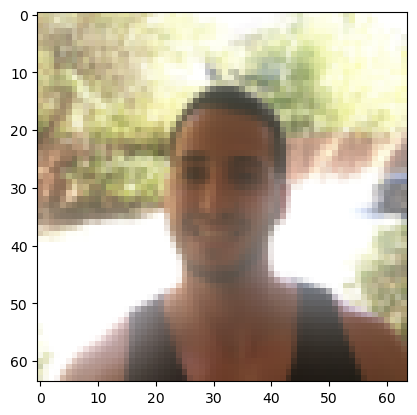

In [4]:
index = 35
plt.imshow(X_train[index]) #display sample training image
print("The person is happy '1' or not happy '0' :", Y_train[index])
plt.show()

### The Sequential API
I use TF Keras' Sequential API to build a model layer by layer. This works well because I have excatly one input tensor and one output tensor. The model contains the following layers
- ZeroPadding2D with padding 3
- Conv2D with 7x7 filters and stride of 1
- BatchNormalization
- ReLU activation function
- MaxPool2D with default parameters
- Flatten the previous output
- Dense fully-connected layer with sigmoid activation

In [5]:
happy_model = tf.keras.Sequential([
                tfl.ZeroPadding2D(padding=(3, 3),input_shape=(64,64,3)),
                tfl.Conv2D(32, (7,7), strides = (1,1)),
                tfl.BatchNormalization(axis=3),
                tfl.ReLU(),
                tfl.MaxPooling2D(),
                tfl.Flatten(),
                tfl.Dense(1, activation='sigmoid')
              ])

In [6]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                        

This architecture gives 37569 trainable parameters, which is easily handled by a single CPU.

### The model is created and can now be compiled with different optimizers.

## RMSProp Optimizer

In [7]:
RMSProp_model = happy_model
RMSProp_model.compile(loss ='binary_crossentropy',
                      metrics =['accuracy'],
                      optimizer='RMSProp')

In [8]:
RMSProp_model_history = RMSProp_model.fit(X_train, Y_train, epochs=10, batch_size=16, validation_split=0.1)

Epoch 1/10


34/34 [==============================] - 2s 21ms/step - loss: 3.9519 - accuracy: 0.5667 - val_loss: 0.4277 - val_accuracy: 0.7167
Epoch 2/10
34/34 [==============================] - 1s 16ms/step - loss: 1.1812 - accuracy: 0.7741 - val_loss: 0.2841 - val_accuracy: 0.9000
Epoch 3/10
34/34 [==============================] - 1s 15ms/step - loss: 1.2190 - accuracy: 0.7833 - val_loss: 0.8026 - val_accuracy: 0.6167
Epoch 4/10
34/34 [==============================] - 0s 14ms/step - loss: 0.6806 - accuracy: 0.8685 - val_loss: 0.1621 - val_accuracy: 0.9500
Epoch 5/10
34/34 [==============================] - 1s 16ms/step - loss: 0.5398 - accuracy: 0.8574 - val_loss: 0.3652 - val_accuracy: 0.8500
Epoch 6/10
34/34 [==============================] - 0s 14ms/step - loss: 0.6832 - accuracy: 0.8685 - val_loss: 0.3926 - val_accuracy: 0.8833
Epoch 7/10
34/34 [==============================] - 1s 15ms/step - loss: 0.5306 - accuracy: 0.8981 - val_loss: 0.1075 - val_accuracy: 0.9500
Epoch 8/10


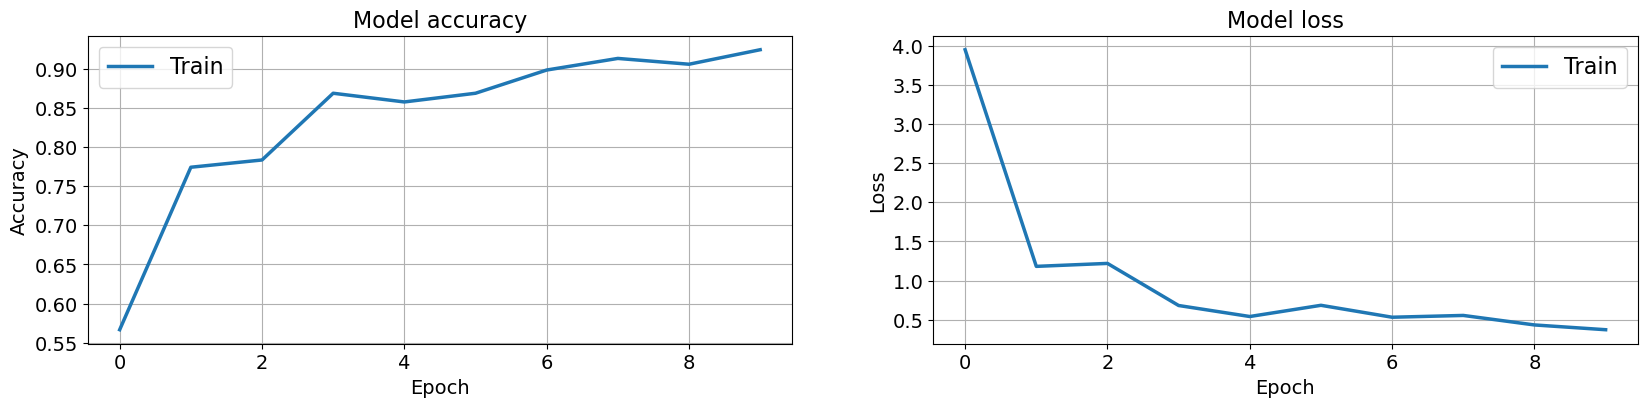

In [9]:
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(RMSProp_model_history.history['accuracy'], lw = 2.5)
plt.title('Model accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["Train"], loc='upper left', fontsize = 16)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(RMSProp_model_history.history['loss'], lw = 2.5)
plt.title('Model loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["Train"], loc='upper right', fontsize = 16)
plt.grid()
plt.show()

Note: The non-monotonic decrease in loss is because of batch normalization

In [10]:
RMSProp_evaluation = RMSProp_model.evaluate(X_test, Y_test)
print ("\nTest Accuracy = " + str(RMSProp_evaluation[1]))
print ("Loss = " + str(RMSProp_evaluation[0]))

5/5 [==============================] - 0s 10ms/step - loss: 0.7475 - accuracy: 0.8267

Test Accuracy = 0.8266666531562805
Loss = 0.7474579811096191


After running the RMSProp optimizer for a few epochs it returns
- Test Accuracy = 82.6 %
- Final loss = 0.747

Let's see the performance using the Adam optimizer with same inputs

## Adam Optimizer

In [11]:
Adam_model = happy_model
Adam_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [12]:
Adam_model_history = Adam_model.fit(X_train, Y_train, epochs=10, batch_size=16, validation_split=0.1)

Epoch 1/10
34/34 [==============================] - 2s 21ms/step - loss: 0.2663 - accuracy: 0.9352 - val_loss: 0.0827 - val_accuracy: 0.9667
Epoch 2/10
34/34 [==============================] - 1s 17ms/step - loss: 0.0939 - accuracy: 0.9704 - val_loss: 0.0813 - val_accuracy: 0.9500
Epoch 3/10
34/34 [==============================] - 1s 16ms/step - loss: 0.1164 - accuracy: 0.9667 - val_loss: 0.4881 - val_accuracy: 0.8000
Epoch 4/10
34/34 [==============================] - 1s 16ms/step - loss: 0.0964 - accuracy: 0.9759 - val_loss: 0.9495 - val_accuracy: 0.7500
Epoch 5/10
34/34 [==============================] - 1s 16ms/step - loss: 0.0599 - accuracy: 0.9778 - val_loss: 0.2294 - val_accuracy: 0.9333
Epoch 6/10
34/34 [==============================] - 1s 16ms/step - loss: 0.0746 - accuracy: 0.9741 - val_loss: 0.4311 - val_accuracy: 0.8500
Epoch 7/10
34/34 [==============================] - 1s 16ms/step - loss: 0.0576 - accuracy: 0.9796 - val_loss: 3.2696 - val_accuracy: 0.5000
Epoch 8/10
34

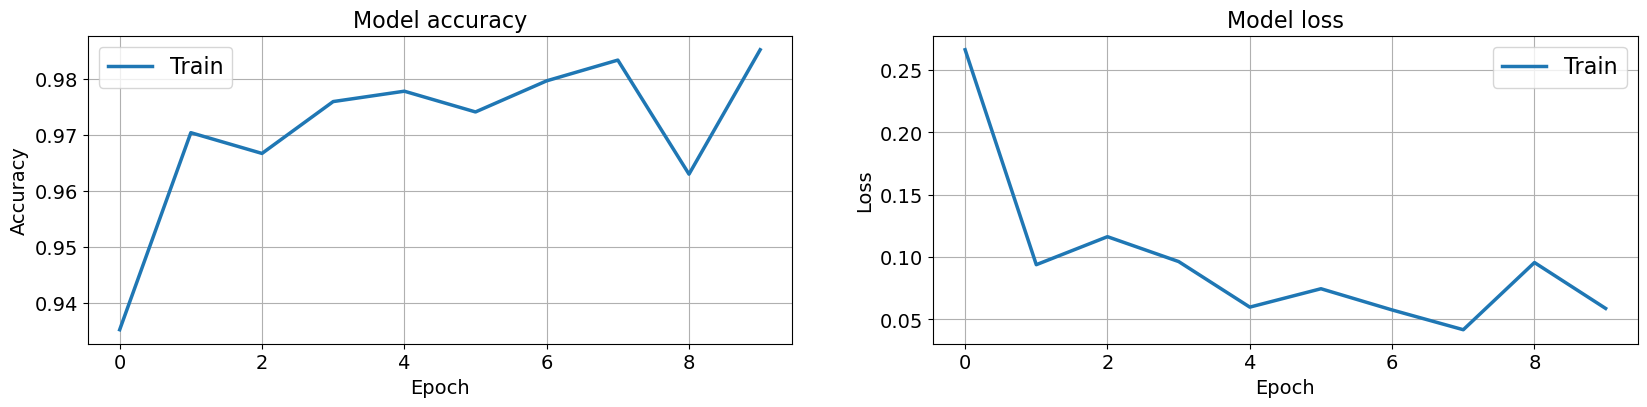

In [13]:
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(Adam_model_history.history['accuracy'], lw = 2.5)
plt.title('Model accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["Train"], loc='upper left', fontsize = 16)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(Adam_model_history.history['loss'], lw = 2.5)
plt.title('Model loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["Train"], loc='upper right', fontsize = 16)
plt.grid()
plt.show()

In [14]:
adam_evaluation = Adam_model.evaluate(X_test, Y_test)
print ("\nTest Accuracy = " + str(adam_evaluation[1]))
print ("Loss = " + str(adam_evaluation[0]))

5/5 [==============================] - 0s 10ms/step - loss: 0.3958 - accuracy: 0.8600

Test Accuracy = 0.8600000143051147
Loss = 0.3958154618740082


After running the Adam optimizer for a few epochs it returns
- Test Accuracy = 86.0 %
- Final loss = 0.396

In [15]:
print("RMSProp test Accuracy = " + str(RMSProp_evaluation[1]))
print("RMSProp test Loss = " + str(RMSProp_evaluation[0]))
print("Adam test Accuracy = " + str(adam_evaluation[1]))
print("Adam test Loss = " + str(adam_evaluation[0]))

RMSProp test Accuracy = 0.8266666531562805
RMSProp test Loss = 0.7474579811096191
Adam test Accuracy = 0.8600000143051147
Adam test Loss = 0.3958154618740082


Adamn performs better overall with higher accuracy and lower loss.

Now that an optimizer has been chosen, the model can run for longer to get a better estimate.

#### The model will run for 50 epochs with a batch size of 150 for the Adam Optimizer

In [16]:
longer_model = happy_model
longer_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [17]:
longer_model_history = longer_model.fit(X_train, Y_train, epochs=50, batch_size=150, validation_split=0.1)

Epoch 1/50
4/4 [==============================] - 2s 219ms/step - loss: 0.1403 - accuracy: 0.9611 - val_loss: 0.1822 - val_accuracy: 0.9167
Epoch 2/50
4/4 [==============================] - 0s 106ms/step - loss: 0.0351 - accuracy: 0.9870 - val_loss: 0.1912 - val_accuracy: 0.9333
Epoch 3/50
4/4 [==============================] - 0s 111ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.8731 - val_accuracy: 0.8333
Epoch 4/50
4/4 [==============================] - 0s 112ms/step - loss: 0.0212 - accuracy: 0.9907 - val_loss: 0.1448 - val_accuracy: 0.9500
Epoch 5/50
4/4 [==============================] - 0s 106ms/step - loss: 0.0192 - accuracy: 0.9907 - val_loss: 0.1227 - val_accuracy: 0.9333
Epoch 6/50
4/4 [==============================] - 0s 110ms/step - loss: 0.0198 - accuracy: 0.9944 - val_loss: 0.0788 - val_accuracy: 0.9667
Epoch 7/50
4/4 [==============================] - 0s 108ms/step - loss: 0.0196 - accuracy: 0.9926 - val_loss: 0.0730 - val_accuracy: 0.9500
Epoch 8/50
4/4 [====

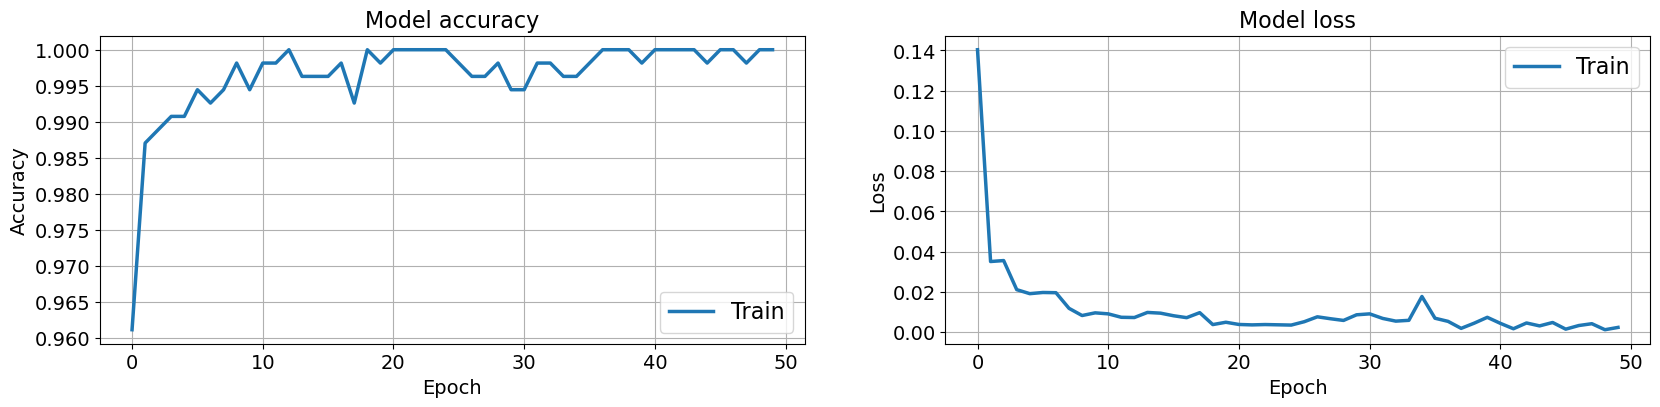

In [20]:
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(longer_model_history.history['accuracy'], lw = 2.5)
plt.title('Model accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["Train"], loc='lower right', fontsize = 16)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(longer_model_history.history['loss'], lw = 2.5)
plt.title('Model loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["Train"], loc='upper right', fontsize = 16)
plt.grid()
plt.show()

In [19]:
evaluation = longer_model.evaluate(X_test, Y_test)
print ("\nTest Accuracy = " + str(evaluation[1]))
print ("Loss = " + str(evaluation[0]))

5/5 [==============================] - 0s 9ms/step - loss: 0.0994 - accuracy: 0.9667

Test Accuracy = 0.9666666388511658
Loss = 0.09935429692268372


#### The model achieves a better train and test accuracy when running for more epochs.
#### The model can definitely distinguish between smiling and not smiling faces, even when the images are only 64x64 pixels. 